
<html>
<head>
<style>
.city {
  background-color: tomato;
  color: white;
  border: 2px solid black;
  margin: 20px;
  padding: 20px;
}
</style>
</head>
<body>


<html>
<head>
<style>
.question {
  color: red;
  border: 2px solid black;
  margin: 20px;
  padding: 20px;
}
</style>
</head>
<body>

In [1]:
#Import Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns


<html>
<h1 style="color:navy">Question 1:</h1>
<i> Read the “FuelEfficiency.csv” dataset</i>
</html>


In [2]:
#read json file from the directory
df = pd.read_csv("FuelEfficiency.csv")
print(df) #print the dataframe

            Model  Eng Size  Cylinders   MSRP  City_L/100km  Highway_L/100km  \
0              A4       1.8          4  25550          12.8              9.1   
1        3_Series       2.5          6  28100          14.1              9.7   
2             G35       3.5          6  28150          15.7             10.9   
3          X-Type       2.5          6  29330          14.9             10.1   
4         C-class       1.8          4  29250          12.8              9.4   
..            ...       ...        ...    ...           ...              ...   
79     Element_EX       2.4          4  19700          12.8             10.9   
80     Escape_XLS       3.0          6  20400          14.9             11.3   
81  Liberty_Sport       2.4          4  18380          14.9             11.8   
82      Xterra_XE       3.3          6  20500          18.8             14.9   
83            VUE       2.2          4  19005          12.8             10.1   

    Weight_in_Pounds   Type  Country  


<html>
<h1 style="color:navy">Question 2:</h1>
<i> Which pair of the variables in the dataset are most strongly correlated? Which pair 
of the variables in the dataset are most weakly correlated? Justify your answer using any 
suitable plot</i>
</html>


In [3]:
corrmatrix=df.corr()
round(corrmatrix,2)

,Eng Size,Cylinders,MSRP,City_L/100km,Highway_L/100km,Weight_in_Pounds
Eng Size,1.00,0.91,0.69,0.85,0.74,0.76
Cylinders,0.91,1.00,0.75,0.80,0.67,0.72
MSRP,0.69,0.75,1.00,0.65,0.55,0.59
City_L/100km,0.85,0.80,0.65,1.00,0.87,0.86
Highway_L/100km,0.74,0.67,0.55,0.87,1.00,0.91
Weight_in_Pounds,0.76,0.72,0.59,0.86,0.91,1.00


from the above output we can see mostly correlated columns are Eng Size, Cylinders and Highway_L/100km , Weight
-in_pounds.

And,
From the above output we can see two weakly correlated columns are Highway_L/100km   MSRP

<AxesSubplot:>

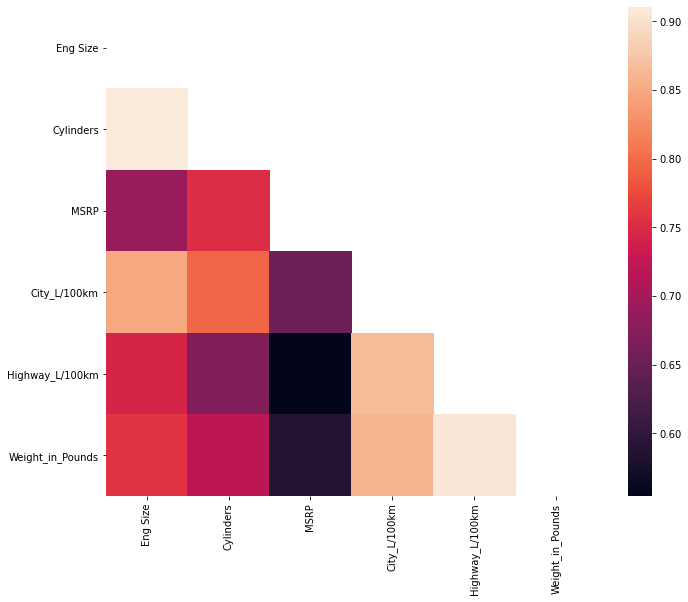

In [16]:
## Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmatrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)




# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmatrix, mask=mask)

<html>
<h1 style="color:navy">Question 3:</h1>
<i> What are the minimum and maximum weights (in pounds) in the dataset?</i>
</html>


In [8]:
#maximum weight in pounds

maxWeight=df['Weight_in_Pounds'].max()
maxWeight

6400

In [10]:
#minimum weight in pounds

minWeight=df['Weight_in_Pounds'].min()
minWeight

2469

<html>
<h1 style="color:navy">Question 4:</h1>
<i> Add a column to the dataset to filter the weight in pounds variable. More
specifically, create a column that has the value 1 for cars whose weight is less than 4000 pounds,
and the value 0 for cars whose weight is greater than or equal to 4000 pounds. Essentially, we
will use this filter to restrict the range of the weight variable to under 4000 pounds.
</i>
</html>

In [12]:

#where function is used for making new column with the conditions provided
#np.where(condition, value if condition is true, value if condition is false)
df['weight_value']= np.where(df['Weight_in_Pounds']>=4000,0,1)
zero_value = df[df['weight_value'] == 0].head() #shows value with weight greater than or equal to 4000 pounds
zero_value

,Model,Eng Size,Cylinders,MSRP,City_L/100km,Highway_L/100km,Weight_in_Pounds,Type,Country,weight_value
28,Crown_Victoria_LX,4.6,8,27220,16.6,11.3,4057,Sedan,US,0
32,A8_L,4.2,8,68500,16.6,11.8,4399,Sedan,Germany,0
33,745i,4.4,8,69300,15.7,10.9,4376,Sedan,Germany,0
35,S-Class,4.3,8,74250,16.6,11.8,4160,Sedan,Germany,0
48,Sedona_EX,3.5,6,22085,18.8,14.1,4802,Minivan,Korea,0


In [13]:
one_value = df[df['weight_value'] == 1].head() #shows value with weight less than 4000 pounds
one_value

,Model,Eng Size,Cylinders,MSRP,City_L/100km,Highway_L/100km,Weight_in_Pounds,Type,Country,weight_value
0,A4,1.8,4,25550,12.8,9.1,3252,Sedan,Germany,1
1,3_Series,2.5,6,28100,14.1,9.7,3219,Sedan,Germany,1
2,G35,3.5,6,28150,15.7,10.9,3336,Sedan,Japan,1
3,X-Type,2.5,6,29330,14.9,10.1,3428,Sedan,England,1
4,C-class,1.8,4,29250,12.8,9.4,3250,Sedan,Germany,1


<html>
<h1 style="color:navy">Question 5:</h1>
<i> Determine the correlation between weight in pounds and litres of fuel consumed per
100 km on the highway only for cars with a weight less than 4000 pounds. How does this value
compare to the value obtained when considering all cars?
</i>
</html>

In [14]:
#coorelation between two columns for all the cars
corcolumn=df['Weight_in_Pounds'].corr(df['Highway_L/100km'])
corcolumn.round(2)

0.91

In [15]:
#coorelation between two columns for cars with a weight less than 4000 pounds
cor_with_condition=df[df['weight_value']==1].corr().loc['Weight_in_Pounds', 'Highway_L/100km']
cor_with_condition.round(2)


0.72

Correlation with weight less than 4000 pounds is less than the correlation with all the cars

<html>
<h1 style="color:navy">Question 6:</h1>
<i> Suppose I created a subset of the data to restrict the weight to between 3000 and
4000 pounds. Would the correlation between highway fuel consumption and weight subject to
this restriction be greater than or less than the value you obtained in Question 7? Explain.
</i>
</html>

In [24]:
subset=df[(df['Weight_in_Pounds']>3000) & (df['Weight_in_Pounds']<4000)] #creates a subset of the dataset with only car weight
                                                                        #between 3000 and 4000 pounds
subset.head(2)

,Model,Eng Size,Cylinders,MSRP,City_L/100km,Highway_L/100km,Weight_in_Pounds,Type,Country,weight_value
0,A4,1.8,4,25550,12.8,9.1,3252,Sedan,Germany,1
1,3_Series,2.5,6,28100,14.1,9.7,3219,Sedan,Germany,1


In [32]:
#correlation
cor_of_subset=subset['Highway_L/100km'].corr(subset['Weight_in_Pounds'])
cor_of_subset.round(2)

0.53

<html>
<h1 style="color:navy">Question 7:</h1>
<i> Calculate the correlation coefficient between highway fuel consumption and weight
for vehicles with a weight between 3000 and 4000 pounds.
</i>
</html>

In [31]:
# step 3 Now we can verify our result by calculating the corrolation coeffient

# calculate Pearson's correlation

corr, _ = sp.stats.pearsonr(subset['Highway_L/100km'], subset['Weight_in_Pounds'])

# check the value of the corrolation
corr

0.5331992637793957